In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
from sklearn.metrics import r2_score, explained_variance_score

In [ ]:
dataset = pd.read_csv('test_scores.csv')
dataset.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [ ]:
dataset.drop(['school', 'classroom', 'student_id'], axis = 1, inplace = True)

In [ ]:
dataset.head()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset["school_setting"]=encoder.fit_transform(dataset["school_setting"])
dataset["school_type"]=encoder.fit_transform(dataset["school_type"])
dataset["teaching_method"]=encoder.fit_transform(dataset["teaching_method"])
dataset["gender"]=encoder.fit_transform(dataset["gender"])
dataset["lunch"]=encoder.fit_transform(dataset["lunch"])

dataset


,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,2,0,1,20.0,0,0,62.0,72.0
1,2,0,1,20.0,0,0,66.0,79.0
2,2,0,1,20.0,1,0,64.0,76.0
3,2,0,1,20.0,0,0,61.0,77.0
4,2,0,1,20.0,1,0,64.0,76.0
...,...,...,...,...,...,...,...,...
2128,2,1,1,30.0,0,0,39.0,55.0
2129,2,1,1,30.0,0,1,38.0,46.0
2130,2,1,1,30.0,0,1,45.0,51.0
2131,2,1,1,30.0,1,1,46.0,53.0


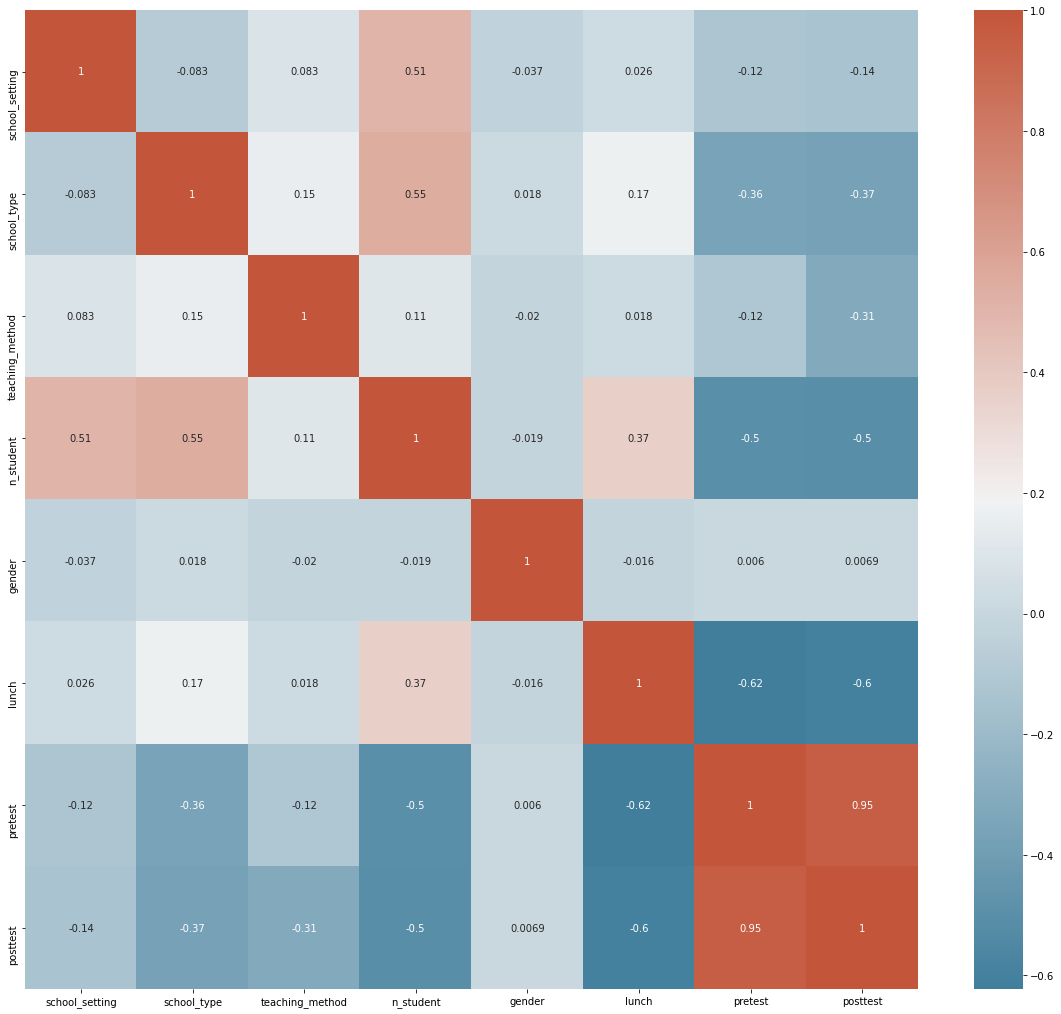

In [ ]:
import matplotlib.pyplot as plt
corr = dataset.corr()

f, ax = plt.subplots(figsize=(20, 18))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True,  cmap=cmap)

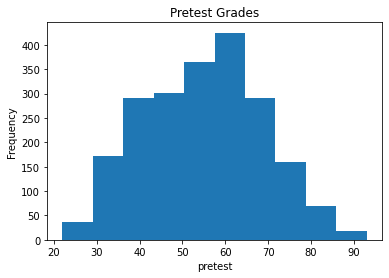

In [ ]:
plt.title("Pretest Grades")
plt.xlabel("pretest")
dataset["pretest"].plot.hist()

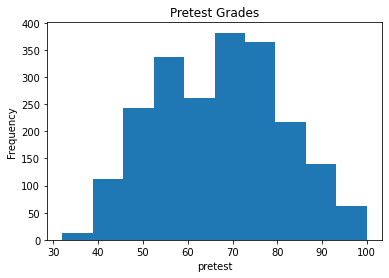

In [ ]:
plt.title("Pretest Grades")
plt.xlabel("pretest")
dataset["posttest"].plot.hist()

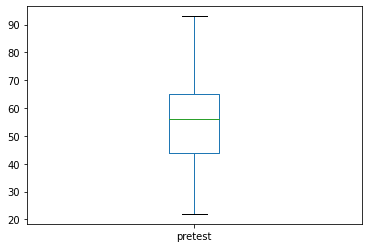

In [ ]:
dataset["pretest"].plot.box()

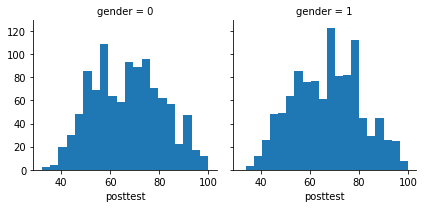

In [ ]:
grid = sns.FacetGrid(dataset, col="gender")
grid.map(plt.hist, "posttest",bins=20)
# grid.add_legend()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

x=dataset["pretest"].values[:,np.newaxis]
y=dataset["posttest"].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 19.94998476435477
R squared 0.8989095735245421
